In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import mlgrad.model as model
import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.loss as loss
import mlgrad.regr as regr

import sys
print(sys.version)

3.11.2 (main, Mar 13 2023, 12:18:29) [GCC 12.2.0]


In [2]:
df = pd.read_csv("../data/HIP_star.csv", sep=',', usecols=['Vmag','B-V'])
df.dropna(inplace=True)
df

,Vmag,B-V
0,9.27,0.999
1,8.65,0.778
2,10.78,1.150
3,10.57,1.030
4,9.93,1.068
...,...,...
2714,8.38,0.651
2715,8.28,0.734
2716,8.16,0.652
2717,7.72,0.563


In [3]:
X = Vmag = df['Vmag'].values
Y = B_V = df['B-V'].values
Xs = X[:,None]

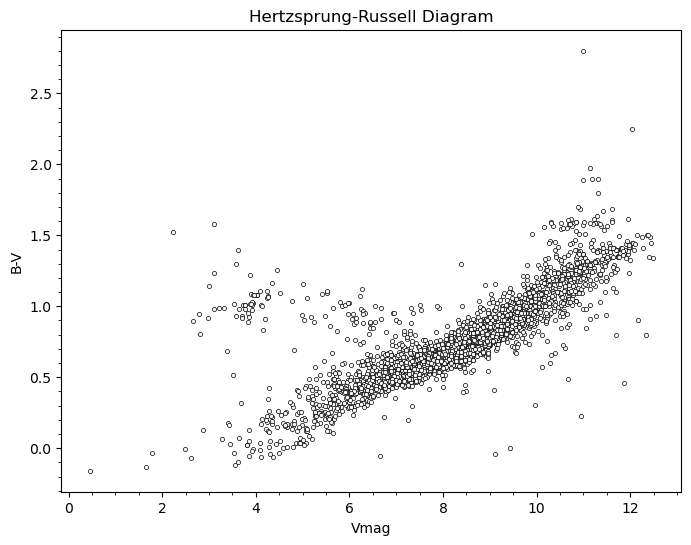

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.show()

In [5]:
mod_ls = model.LinearModel(1)
mod_ls.init_param()
mod_r = model.LinearModel(1)
mod_r.init_param()
mod_m = model.LinearModel(1)
mod_m.init_param()
mod_wm = model.LinearModel(1)
mod_wm.init_param()
# mod_wmm = model.LinearModel(1)
# mod_wmm.init_param()
# mod_ls2 = model.LinearModel(1)
# mod_ls2.init_param()

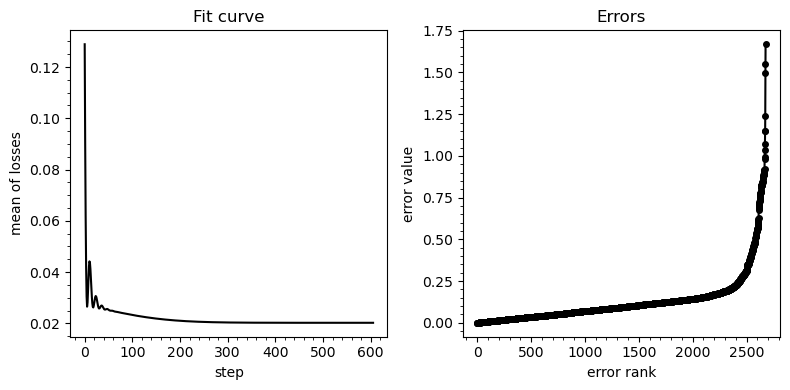

In [6]:
regr_ls = regr.regression(Xs, Y, mod_ls, 
                          h=0.01, n_iter=1000)
regr.plot_losses_and_errors(regr_ls, Xs, Y, logscale=False)

0.015001049574402759


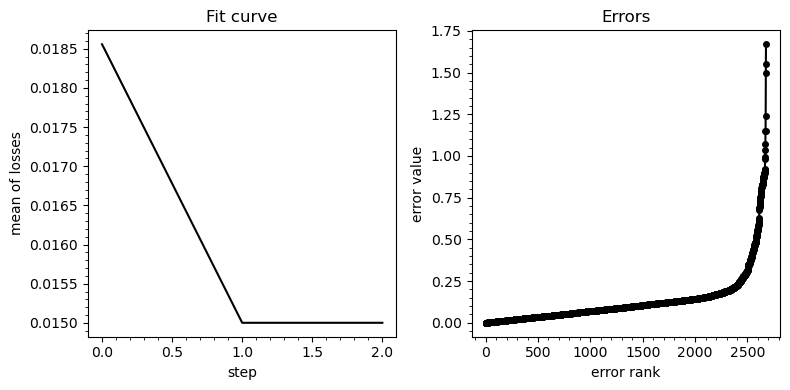

In [7]:
regr_r = regr.r_regression_irls(Xs, Y, mod_r, 
                                func.Huber(), h=0.01, n_iter=1000)
regr.plot_losses_and_errors(regr_r, Xs, Y)

0.002476894512660032


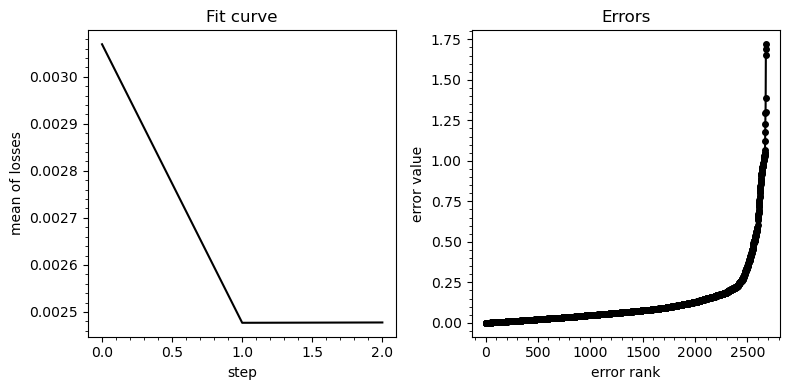

In [8]:
avrfunc_m = regr.averaging_function("M", func.quantile_func(0.5, func.Sqrt(0.001)))
regr_m = regr.m_regression_irls(Xs, Y, mod_m, 
                                agg_func=avrfunc_m, h=0.01, n_iter=1000)
regr.plot_losses_and_errors(regr_m, Xs, Y)

0.003041089189556012


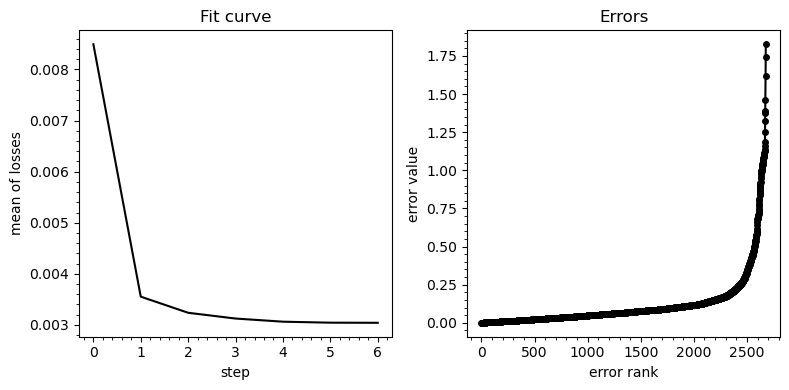

In [9]:
avrfunc_wm = regr.averaging_function("WM", func.quantile_func(0.75, func.Sqrt(0.001)))
regr_wm = regr.m_regression_irls(Xs, Y, mod_wm, 
                                 agg_func=avrfunc_wm, h=0.01, n_iter=1000)
regr.plot_losses_and_errors(regr_wm, Xs, Y)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


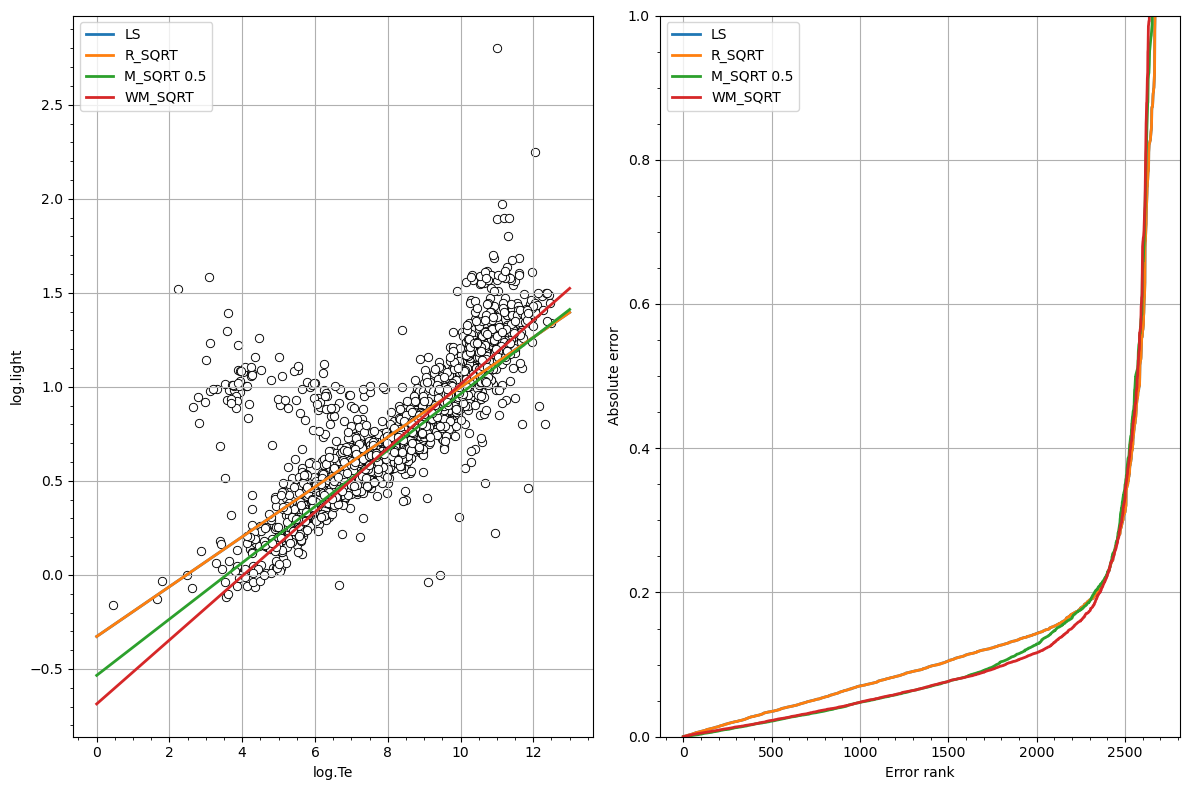

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.plot([0,13], mod_ls.evaluate_all([0,13]), label='LS', linewidth=2.)
plt.plot([0,13], mod_r.evaluate_all([0,13]), label='R_SQRT', linewidth=2.)
plt.plot([0,13], mod_m.evaluate_all([0,13]), label='M_SQRT 0.5', linewidth=2.)
plt.plot([0,13], mod_wm.evaluate_all([0,13]), label='WM_SQRT', linewidth=2.)
plt.legend()
plt.minorticks_on()
plt.grid(1)
plt.subplot(1,2,2)
plt.plot(sorted(np.abs(Y-mod_ls.evaluate_all(Xs))), label='LS', linewidth=2.)
plt.plot(sorted(np.abs(Y-mod_r.evaluate_all(Xs))), label='R_SQRT', linewidth=2.)
plt.plot(sorted(np.abs(Y-mod_m.evaluate_all(Xs))), label='M_SQRT 0.5', linewidth=2.)
plt.plot(sorted(np.abs(Y-mod_wm.evaluate_all(Xs))), label='WM_SQRT', linewidth=2.)
plt.ylim(0,1)
plt.legend()
plt.minorticks_on()
plt.xlabel('Error rank')
plt.ylabel('Absolute error')
plt.grid(1)
plt.tight_layout()
plt.savefig('fig/rob_linregr_starsCYG.eps')
plt.show()